In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scipy as sp
import json
import os
import math

import matplotlib
from matplotlib import pyplot as plt
plt.style.use('ggplot')

from matplotlib.path import Path

from datetime import datetime
from dateutil import tz
import time
import datetime
import calendar

from IPython.display import Markdown


from stravalib.client import Client
from stravalib import unithelper

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
m_to_yd = 1.09361
m_to_miles = 1609.34

catalina_yd = 35323.71

json_data=open('{0}/strava_credentials.json'.format(os.getenv("HOME"))).read()
credentials = json.loads(json_data)
client = Client(access_token=credentials['AccessToken'])

In [4]:
activities = client.get_activities(after='2017-01-01', before='2017-09-05')

my_swims = pd.DataFrame([{'name':activity.name, 
                          'id': activity.id, 
                          'stroke_count': 2 * activity.average_cadence if activity.average_cadence is not None else None,
                          'average_speed':float(unithelper.meters_per_second(activity.average_speed)),
                          'elapsed_time':unithelper.timedelta_to_seconds(activity.elapsed_time), 'start_date': activity.start_date,
                          'distance':float(unithelper.meters(activity.distance)) * m_to_yd} for activity in activities if activity.type=='Swim'])
my_swims = my_swims.set_index('start_date')
my_swims.index = pd.DatetimeIndex(my_swims.index)
my_swims.index = my_swims.index.tz_convert('US/Pacific')
my_swims['month'] = my_swims.index.month
my_swims['month_name'] = my_swims['month'].apply(lambda x: calendar.month_abbr[x])
my_swims['ds_week_ending'] = my_swims.index.to_period('W').end_time
my_swims['is_pool'] = ['pool' if "[POOL]" in name else 'open water' for name in my_swims.name]
my_swims['hours']=my_swims.elapsed_time/3600

No handlers could be found for logger "stravalib.model.Activity"


![alt text](../images/CatalinaMan.jpg "Title")

In this post I'll mix a bit of data visualization with the account of my training for my first channel swim.

I am based in San Francisco and member of the two Open Water Clubs in town: the [Dolphin Club](http://www.dolphinclub.org/) and the Mighty [South End](http://serc.com/).

My first approach to Marathon swimming has been in 2015/2016, training for Bay to Breakers. By the end of 2016, as I moved more steps in the world of Marathon Swimming, I decided I was ready to tackle some serious Channel Swimming. 

Inspired by my buddy [Zach](https://zachmargolis.com/swims/), my friend Andrew and I decided to go for the Catalina Channel. This covered all the basis: 

* It's Local: easier to get to without having to haul all the "stuff" across an Ocean.
* It's Long: approximately the same distance of the English Channel
* It's Hard: both part of the [Ocean 7](https://en.wikipedia.org/wiki/Ocean%27s_seven) and the [Triple Crown](http://www.triplecrownofopenwaterswimming.com/)

[Andrew](http://nighttrainswimmers.org/swimmers/andrew-wynn/), far more organized than yours truly, researched and found information about training plans, and off we went. 


http://nighttrainswimmers.org/swimmers/david-holscher/



http://dailynews.openwaterswimming.com/2017/10/ryan-utsumi-does-double-triple-crown.html

## The Plan

### Vox Populi

First of all we researched on the more reliable forums:

* From the [marathonswimmers blog](http://marathonswimmers.org/forum/discussion/20/weekly-training-volume-for-completing-marathon-swims/p2#Comment_19509): 
    1. Weekly training volume should be (at least) equal to your target swim distance, for several months.
    2. At least one training swim of 65-75% of your target distance.
    3. other people suggest that 40 to 45k per week is required from the start of the relevant calender year.
* From the 
[usms forum](http://forums.usms.org/showthread.php?20306-what-does-it-take-to-swim-big-distance/page2&p=262847#post262847):
    1. At least 60-75% of the length of the swim before you attempt it. 
    2. Train about 35K-50K yards per week for at least 6 months prior to a marathon swim and do at least 3 swims of over 6 hours during that time
    3. Train for at least 6-8 months for a swim of over 15 miles, and for a swim over 20 miles, which will usually take in the 7-10+ hour range, a swimmer should have done at least 2 swims of 6 hours or more in the prep up to the swim, but not closer than 3-4 weeks before the "big" swim.

Another detailed [Channel Training Plan](http://swimkatie.com/the-training-plan).


### Our Plan

Our plan ended up being quite simple and flexible: a progression of weekly yards and a crescendo of training benchmarks:	
* At least one 15 Mile Training Swim
* Night swimming experience
* 4x50% swims (10 miles) 
* 37k week for 3 months prior	

| Month    | Days | Yardage |    Yds/Day   |  Yds/Week |  hrs/Week |
| :------- |:---: | :-----: | :----------: | :-------: | :-------: |
| January  | 31   | 125000  | 4032.258065  |   28225   |    7.6    |
| February | 28   | 130000  | 4642.857143  |   32500   |    9.8    |
| March    | 31   | 140000  | 4516.129032  |   31615   |   10.6    |
| April    | 31   | 140000  | 4516.129032  |   31615   |   10.6    |
| May      | 31   | 140000  | 4516.129032  |   31615   |    8.5    |
| June     | 30   | 150000  | 5000         |   35000   |   11.4    |
| July     | 31   | 150000  | 4838.709677  |   33870   |    9.1    |
| August   | 31   | 150000  | 4838.709677  |   33870   |   11.4    |

## The Execution

We ended up following the plan quite closely, hitting above the mark for most of the training.

In [15]:
monthly = my_swims.groupby(my_swims.index.month)['distance', 'hours'].sum()
monthly["weekly distance"] = monthly.distance/4.0
monthly.index = monthly.index.map(lambda x: datetime.date(1900, x, 1).strftime('%B'))
monthly

,distance,hours,weekly distance
start_date,,,
January,117621.145691,36.169722,29405.286423
February,113964.223212,32.742778,28491.055803
March,151203.174766,41.527778,37800.793691
April,166400.416770,45.491111,41600.104193
May,167658.286992,44.416111,41914.571748
June,151240.794950,41.005833,37810.198738
July,152194.094787,44.221389,38048.523697
August,117810.230860,34.027778,29452.557715
September,13867.740327,10.784722,3466.935082


In [22]:
Markdown("""
##### Total Yards: {0} 
""".format(int(my_swims.distance.sum())))


##### Total Yards: 1151960 


### Milestones

The fun part of the training has been pushing the limits and ramping up to longer and longer swims. This is a path full of false starts and learnings.
I like to believe that failures are even more educational than successes, and I had plenty of failures on my training.

#### Two Hours

The two hours mark was hit and passed quite easily, with a beautiful out of cove swim accompanied by a great crew. The infamous [5 Coves of Death](marathonswimmers.org/blog/2013/05/five-coves-of-death/) is another great chance to squeeze 2 challenging swims in a day and hang with a bunch of crazy swimmers.

#### Four Hours

This milestone was harder to hit. This is when feeding and technique started to matter. Not feeding frequently enough is a easy enough error to make, since energies are plenty at the beginning of a swim, but run away quickly if not replenished. Another issue that surfaced was hip cramping. Due to both sighting and bad technique my psoas ended up having to endure too much stress and to lock and cramp. 

* First attempt: the plan was to feed every two miles and to change course after every feed. Andrew was with me and our hips locked after the first hour. The constant changing of the course also didn't help us to focus and we ended up shivering in the sauna.
* Second attempt: on my second attempt I went hypothermic for not feeding not frequently enough. I ended up staying in for 3 grueling hours mostly thanks to the wonderful community that kicked my ass when I tried to bail out at hour 2.
* First 4 hours: [Duke](http://www.ebar.com/news/article.php?sec=news&article=71409) has been a wonderful menthor through all of my training and he stepped in and kayaked for me for 4 hours (plus some, just to be safe). My hips were in some pain, but feeding regularly (Carbo-Pro every 30' plus a Gel on the hour) did the trick. This is the first time I figured out a combination that works for me, and I still stick to it with minor variations. 
* Second 4 hours: Stayed in the [Cove](https://www.flickr.com/photos/150833273@N05/34717813026/in/shares-92GJwn/), feeding after each loop. This helped getting into "The Zone" and to create automatism and habit. 
* Third 4 hours: Andrew, [Catherine](http://nighttrainswimmers.org/swimmers/catherine-breed/) and I hit the [Belvedere Lagoon](http://marathonswimmers.org/forum/discussion/323/ow-swimming-in-belvedere-lagoon-marin-county-ca-and-san-francisco), generous concession of [Bob](http://nighttrainswimmers.org/swimmers/bob-tandler/)
* Fourth 4 hours: Tahoe!!! (7/10/17 Tahoe Swim)

#### Six Hours

Here the psoas issue became really serious and costed me two attempts. The cold water seems to exacerbate some of the flaws in my technique and putting too much strain on the postural muscles, which end up cramping up pretty badly and locking up.

* First attempt: Duke to the resque - too much water in the guts - locked hip - 4:30
* Second attempt: Cove - locked hip (bad) - 3:00
* First 6 hours: Lagoon
* Third Attempt 6 hours: botched Night Swim
* Second 6 hours: Lagoon




#### Eight Hours

* Lagoon at Night (7/17/17 8 hr night swim)

#### Going the Distance & Doing the Time

Here is a day by day breakdown of the plan.

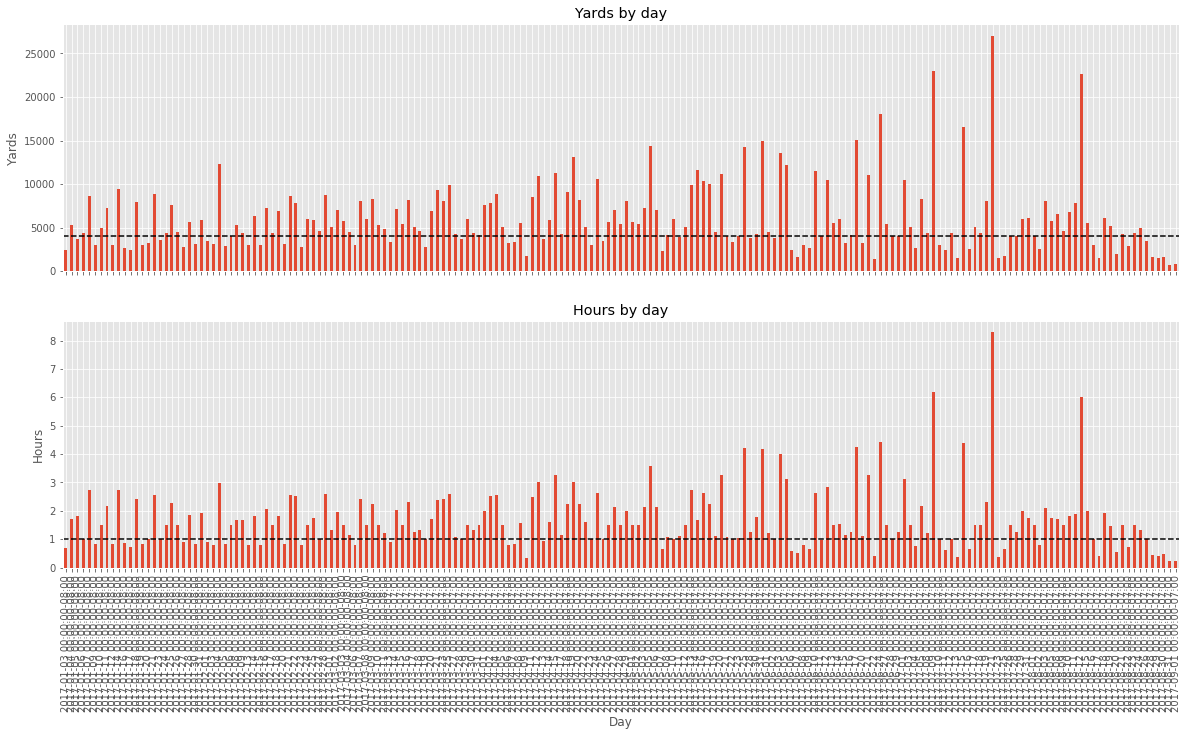

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_title('Yards by day')
axes[1].set_title('Hours by day')


my_swims.groupby(my_swims.index.normalize()).distance.sum().plot(kind='bar', ax=axes[0], sharex=True)
axes[0].axhline(4000, color='k', linestyle='--')
axes[0].set_ylabel('Yards')
#axes[0].step([-1, max(np.where(my_swims.index.normalize().unique().month <= 1)[0])-0.5, 100.5], [0, 3000 / m_to_yd, 4000 / m_to_yd], color='k', linestyle='--')



my_swims.groupby(my_swims.index.normalize()).elapsed_time.sum().apply(lambda x: x / 3600).plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('Hours')
axes[1].set_xlabel('Day')
axes[1].axhline(1, color='k', linestyle='--')
#axes[1].step([-1, max(np.where(my_swims.index.normalize().unique().month <= 1)[0])-0.5, 100.5], [0, 1, 2], color='k', linestyle='--')


The weekly yardage was our actual goal and we did hit it most of the times, staying on average above the distance of Catalina. The ramp up has been pretty gradual, but a huge jump from our previus yardage (November and December averaged around 10k a week). This meant a lot of sore shoulders and slower swims in January February, but, once the initial discomfort settled, we endured the yardage quite easily.

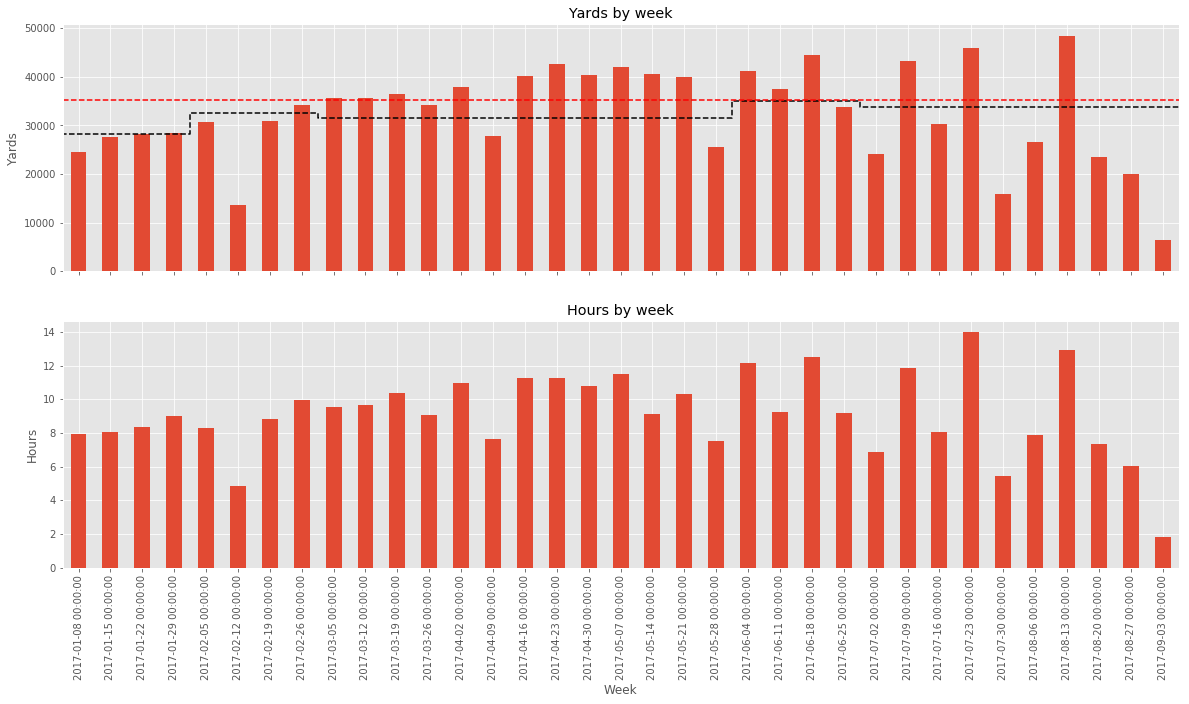

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_title('Yards by week')
axes[1].set_title('Hours by week')


my_swims.groupby(my_swims.ds_week_ending).distance.sum().plot(kind='bar', ax=axes[0], sharex=True)
#axes[0].axhline(28000 / m_to_yd, color='k', linestyle='--')
axes[0].set_ylabel('Yards')
axes[0].step([-1, 3.5, 7.5, 12.5, 16.5, 20.5, 24.5, 28.5, 36.5], 
             [0, 28225, 32500, 31615, 31615, 31615, 35000, 33870, 33870], color='k', linestyle='--')
axes[0].axhline(catalina_yd, color='r', linestyle='--')


my_swims.groupby(my_swims.ds_week_ending).elapsed_time.sum().apply(lambda x: x / 3600).plot(kind='bar', ax=axes[1])
#axes[1].axhline(7.6, color='k', linestyle='--')
axes[1].set_ylabel('Hours')
axes[1].set_xlabel('Week')


#### Indoor/Outdoor

In [9]:
my_swims.groupby(['is_pool'])['distance'].agg({'total' : 'sum', 'percentage' : 'mean'})

/Users/luca_pozzi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,percentage,total
is_pool,,
open water,4539.424467,685453.094522
pool,4529.194309,466507.013833


Tsunami

North Bay Aquatics, coached by [Simon](http://nighttrainswimmers.org/swimmers/simon-dominguez/)

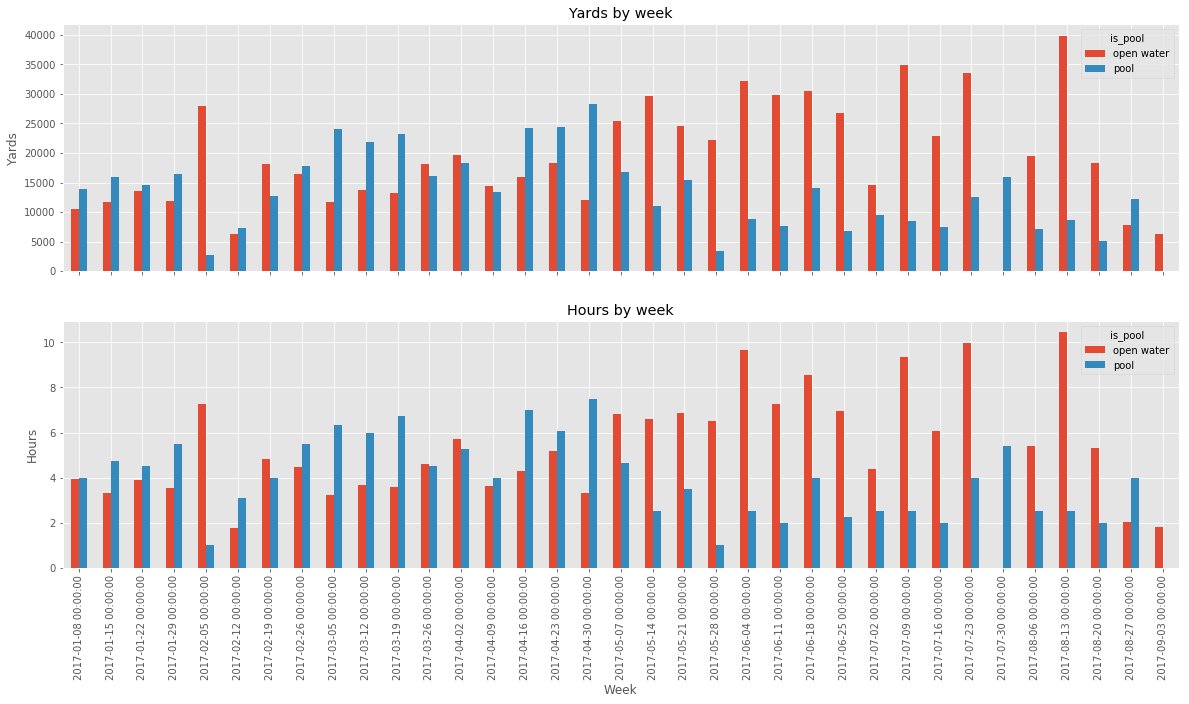

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_title('Yards by week')
axes[1].set_title('Hours by week')

my_swims.groupby(['ds_week_ending', 'is_pool'])['distance'].sum().unstack().plot(kind='bar', ax=axes[0], sharex=True)
axes[0].set_ylabel('Yards')

my_swims.groupby(['ds_week_ending', 'is_pool'])['elapsed_time'].sum().apply(lambda x: x / 3600).unstack().plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('Hours')
axes[1].set_xlabel('Week')


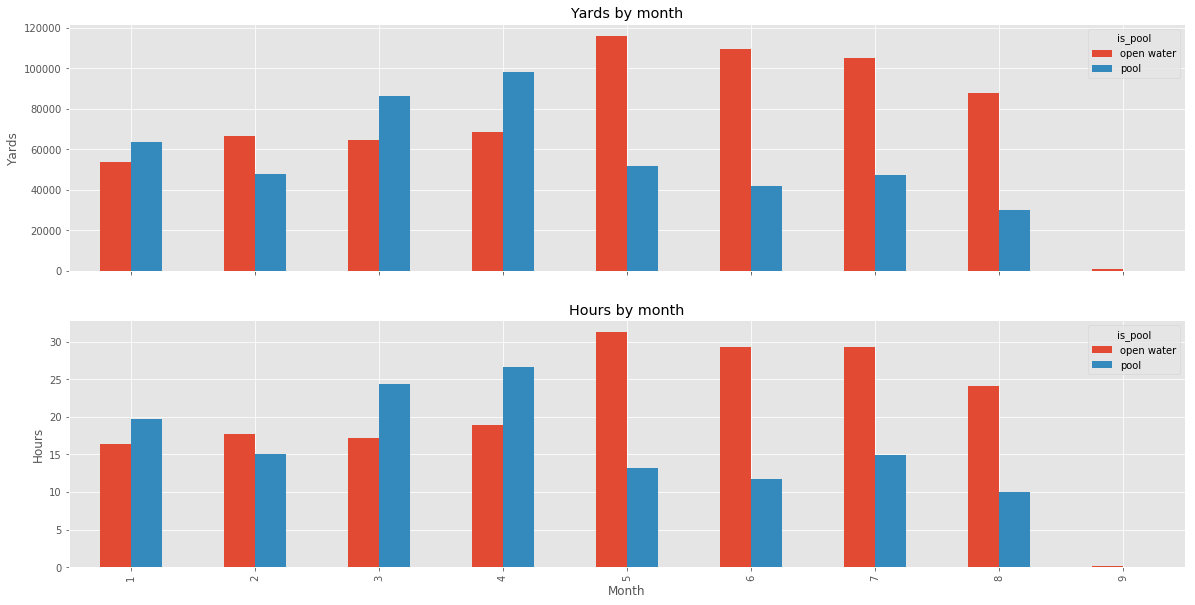

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_title('Yards by month')
axes[1].set_title('Hours by month')


my_swims.groupby(['month', 'is_pool'])['distance'].sum().unstack().plot(kind='bar', ax=axes[0], sharex=True)
axes[0].set_ylabel('Yards')

my_swims.groupby(['month', 'is_pool'])['elapsed_time'].sum().apply(lambda x: x / 3600).unstack().plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('Hours')
axes[1].set_xlabel('Month')


## The Crossing

### The Gear


* [Roka Goggles]()
* [NightTrain Cap]()
* [Ear Plugs]()
* [Desitin]() layer for Sun Protection
* [Vaseline]() (I alternatively use [Bag Balm]()) as protection from chafing. Bring gloves.
* [Ring]()
* [Blinkies]()



### The Feeding Plan


* [The "God" Bottle](https://loneswimmer.com/2011/12/05/review-the-god-bottle-other-bottles/) (available from [Amazon](http://a.co/cZnYH9X))
* [Carbo-Pro](http://a.co/0qNeXN7)
* [CLIF SHOT Energy Gels](http://a.co/0nf6npC) (Citrus is a great flavor and the chocolate based ones are quite decadent)
* Rice Mix
* Energy Blocks: ([Powerbar Cherry](http://a.co/3GYhwRk) being my current favorite)
* [Stinger Waffle](http://a.co/bqK4W3E)
* [Kind Bar]( http://a.co/5wcSVzB) (Dark Chocolate and Cherry)
* [Liquid Ibuprofen]()
* [Berrocca]()

My plan was quite simple

* Odd Feeds: Carbo-Pro + Gel
* Even Feeds Rice
* Every 3 hours a solid feed in addition to the liquid
* Treat around the last one/two hours mark (chocolate truffles...)

I brought plenty of all of the above to be sure to last way more than the expected duration of the swim and to allow my crew to prepare more of my feeds.

### The Crew


* The Boat:
    - BottomScratcher
* The Observers:
    - Dan Simonelli
    - Jax Cole
* My Crew:
    - Kris Killa
    - Andrew Wynn
    - Frankie Lazzaretto
    - Alex Sigal
    - Meghan Earley

### The Swim

Catalina Total: 20.1 mi (32.3 km - 35323.71 yds) 

![alt text](../images/crossing_gps.png)

![alt text](../images/speed.png)

![alt text](../images/water_temp.png)

![alt text](../images/wind_speed.png)

## Learnings

* I still know nothing
* My tolerance to cold needs some serious focus and improvement
* my feeding plan needs some fine tuning

### FAQ

* has he been training for it?
* isn't he afraid of sharks?
* At once?!
* oh! a boat follows you?
* can you get on the boat?
* with a wetsuit right?

## Appendix: The Full Training 

In [10]:
from IPython.display import HTML
HTML(my_swims[['ds_week_ending', 'name', 'distance', 'hours', 'is_pool'
       ]].sort_index(axis=0, ascending=True, inplace=False).to_html())

,ds_week_ending,name,distance,hours,is_pool
start_date,,,,,
2017-01-03 07:09:18-08:00,2017-01-08,First swim of 2017!!,2455.591894,0.700833,open water
2017-01-04 07:11:31-08:00,2017-01-08,GPS mishap,1798.988450,0.719444,open water
2017-01-04 19:27:13-08:00,2017-01-08,[POOL] Gnarly IM,3520.002507,1.000000,pool
2017-01-05 06:00:00-08:00,2017-01-08,[MISC] Yardage missed by the GPS,2187.220000,1.000000,open water
2017-01-05 07:16:01-08:00,2017-01-08,Another GPS fuckup..,1495.074231,0.806944,open water
2017-01-06 07:32:57-08:00,2017-01-08,[POOL] Mission: Zack,4374.440000,1.000000,pool
2017-01-07 08:00:00-08:00,2017-01-08,[POOL] Doing (pool) time,6014.855000,2.000000,pool
2017-01-07 10:43:55-08:00,2017-01-08,Rainbow swim,2641.614955,0.721667,open water
2017-01-09 07:07:18-08:00,2017-01-15,Finally a Flood!!,3002.943699,0.819722,open water


[source](https://github.com/mrpozzi/mrpozzi.github.io/blob/master/notebooks/CatalinaTrainingDashboard.ipynb)